# TP Final - Análisis de Datos

#### Alumnos: Santiago Gonzalez Achaval, Leandro Albachiaro y Scordamaglia Ezequiel

#### Dataset Elegido: Rain in Australia

##### Objetivo: Determinar si va a llover el dia de mañana


In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [301]:
#CARGAMOS EL DATASET
url = '.\data\weatherAUS.csv'
weather = pd.read_csv(url, delimiter = ',')
pd.set_option('display.max_columns', None)
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## ANÁLISIS EXPLORATORIO

In [302]:
#COLUMNAS
weather.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

## Explicacion de las Columnas

- `Date`: La fecha de observación
- `Location`: El nombre común de la ubicación de la estación meteorológica.
- `MinTemp`: La temperatura mínima en grados centígrados
- `MaxTemp`: La temperatura máxima en grados centígrados
- `Rainfall`: La cantidad de lluvia registrada para el día en mm
- `Evaporation`: La llamada evaporación de bandeja Clase A (mm) en las 24 horas a las 9 a.m.
- `Sunshine`: El número de horas de sol brillante en el día.
- `WindGustDir`: La dirección de la ráfaga de viento más fuerte en las 24 horas hasta la medianoche
- `WindGustSpeed`: La velocidad (km/h) de la ráfaga de viento más fuerte en las 24 horas hasta la medianoche
- `WindDir9am`: Dirección del viento a las 9am
- `WindDir3pm`: Dirección del viento a las 15:00
- `WindSpeed9am`: Velocidad del viento (km/h) promediada durante 10 minutos antes de las 9 a.m.
- `WindSpeed3pm`: Velocidad del viento (km/h) promediada durante 10 minutos antes de las 3:00 p. m.
- `Humidity9am`: Humedad (porcentaje) a las 9 a. m.
- `Humidity3pm`: Humedad (porcentaje) a las 15:00
- `Pressure9am`: Presión atmosférica (hpa) reducida al nivel medio del mar a las 9 a. m.
- `Pressure3pm`: Presión atmosférica (hpa) reducida al nivel medio del mar a las 3 p. m.
- `Cloud9am`: Fracción de cielo oscurecida por nubes a las 9 a.m. Esto se mide en "octas", que son una unidad de octavos.
- `Cloud3pm`: Fracción de cielo oscurecida por nubes (en "octas": octavos) a las 15:00 horas. Ver Cload9am para una
- `Temp9am`: Temperatura (grados C) a las 9 am
- `Temp3pm`: Temperatura (grados C) a las 3pm
- `RainToday`: Booleano: 1 si la precipitación (mm) en las 24 horas hasta las 9 am excede 1 mm, de lo contrario 0
- `RainTomorrow`: Booleano: 1 si la precipitación (mm) del dia siguiente excede 1 mm, de lo contrario 0.


In [303]:
#TIPOS DE DATO DE LAS COLUMNAS
weather.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [304]:
#INFORMACION DE LAS COLUMNAS
weather.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [305]:
# CANTIDAD DE DATOS
weather.shape

(145460, 23)

## DATOS CATEGÓRICOS

In [306]:
#COLUMNAS CON DATOS CATEGORICOS
weather.select_dtypes(include=['object']).head(10)

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No
5,2008-12-06,Albury,WNW,W,W,No,No
6,2008-12-07,Albury,W,SW,W,No,No
7,2008-12-08,Albury,W,SSE,W,No,No
8,2008-12-09,Albury,NNW,SE,NW,No,Yes
9,2008-12-10,Albury,W,S,SSE,Yes,No


In [307]:
# CANTIDAD DE VALORES NULOS EN VARIABLES CATEGORICAS
categorical_columns = weather.select_dtypes(include=['object']).columns

weather[categorical_columns].isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [308]:
#PORCENTAJE DE VALORES NULOS EN COLUMNAS
for col in weather.columns:
    if weather[col].isnull().mean()>0:
        print(col, round((weather[col].isnull().mean())*100,4), "%")

MinTemp 1.0209 %
MaxTemp 0.8669 %
Rainfall 2.2419 %
Evaporation 43.1665 %
Sunshine 48.0098 %
WindGustDir 7.0989 %
WindGustSpeed 7.0555 %
WindDir9am 7.2639 %
WindDir3pm 2.9066 %
WindSpeed9am 1.2148 %
WindSpeed3pm 2.105 %
Humidity9am 1.8246 %
Humidity3pm 3.0984 %
Pressure9am 10.3568 %
Pressure3pm 10.3314 %
Cloud9am 38.4216 %
Cloud3pm 40.8071 %
Temp9am 1.2148 %
Temp3pm 2.4811 %
RainToday 2.2419 %
RainTomorrow 2.246 %


### Columna Date
- Es una variable compuesta de 3 datos: Año, Mes y Dia. Se podrían serpar en tres columnas nuevas.

### Columna Location

In [309]:
weather['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [310]:
# CANTIDAD DE MUESTRAS EN CADA CIUDAD
weather['Location'].value_counts()

Location
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown     

### Columnas de Direccion del viento

### WindGustDir

In [311]:
print(weather['WindGustDir'].unique())

['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']


In [312]:
weather['WindGustDir'].value_counts()

WindGustDir
W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: count, dtype: int64

### WindDir9am

In [313]:
print(weather['WindDir9am'].unique())

['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']


In [314]:
weather['WindDir9am'].value_counts()

WindDir9am
N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: count, dtype: int64

### WindDir3pm

In [315]:
print(weather['WindDir3pm'].unique())

['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']


In [316]:
weather['WindDir3pm'].value_counts()

WindDir3pm
SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: count, dtype: int64

### Columna RainToday

In [317]:
weather['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [318]:
weather['RainToday'].value_counts()

RainToday
No     110319
Yes     31880
Name: count, dtype: int64

### Columna RainTomorrow

In [319]:
weather['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [320]:
counts = weather['RainTomorrow'].value_counts()
counts

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

<Axes: xlabel='RainTomorrow', ylabel='count'>

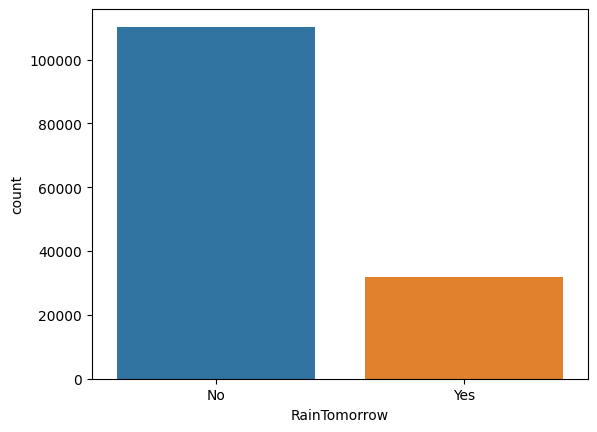

In [321]:
#PROPORCIÓN DE DÍAS DE LLUVIA
sns.countplot(x='RainTomorrow', data=weather)

In [322]:
# PORCENTAJE DE CASOS POSITIVOS FRENTE A LOS NEGATIVOS DEL DATASET COMPLETO
percentages = counts / counts.sum() * 100
percentages

RainTomorrow
No     77.581878
Yes    22.418122
Name: count, dtype: float64

In [323]:
#REGISTROS EN LOS QUE LA VARIABLE OBJETIVO NO TIENE VALOR
weather[weather['RainTomorrow'].isnull()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
14,2008-12-15,Albury,8.4,24.6,0.0,NaN,NaN,NaN,NaN,S,WNW,4.0,30.0,57.0,32.0,1009.7,1008.7,NaN,NaN,15.9,23.5,No,NaN
283,2009-09-10,Albury,2.6,NaN,0.0,NaN,NaN,NaN,NaN,E,WNW,6.0,13.0,71.0,55.0,1017.8,1017.6,NaN,6.0,9.7,14.3,No,NaN
435,2010-02-09,Albury,22.1,35.1,0.0,NaN,NaN,NaN,NaN,ENE,SW,6.0,11.0,58.0,37.0,1020.9,1017.8,NaN,1.0,26.9,33.5,No,NaN
437,2010-02-11,Albury,21.5,35.0,0.0,NaN,NaN,NaN,NaN,SSE,E,9.0,7.0,76.0,35.0,1015.8,1010.3,NaN,8.0,24.2,33.1,No,NaN
443,2010-02-17,Albury,15.5,30.6,0.0,NaN,NaN,NaN,NaN,SE,SSW,6.0,11.0,66.0,30.0,1015.9,1013.8,NaN,NaN,19.4,30.0,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144955,2016-02-07,Uluru,22.5,37.7,0.0,NaN,NaN,SE,50.0,SE,ESE,33.0,26.0,22.0,11.0,1012.6,1009.6,NaN,NaN,28.8,37.2,No,NaN
145091,2016-06-22,Uluru,12.3,19.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.0,62.0,1016.8,1014.1,8.0,8.0,15.6,18.9,No,NaN
145092,2016-06-23,Uluru,14.2,18.7,NaN,NaN,NaN,NaN,NaN,W,NaN,9.0,NaN,81.0,67.0,1015.2,1014.6,8.0,8.0,16.6,17.5,NaN,NaN
145335,2017-02-21,Uluru,13.5,NaN,0.0,NaN,NaN,NaN,NaN,ENE,SW,24.0,7.0,23.0,11.0,1013.7,1008.4,NaN,NaN,25.2,34.4,No,NaN


<div style="color:red; background-color:white; font-size:20px; padding:10px">

PREGUNTA: Conviene borrar los registros en los que la variable objetivo tiene valor nulo?
Vemos que solo son 3267 casos sobre 145460 registros.

</div>

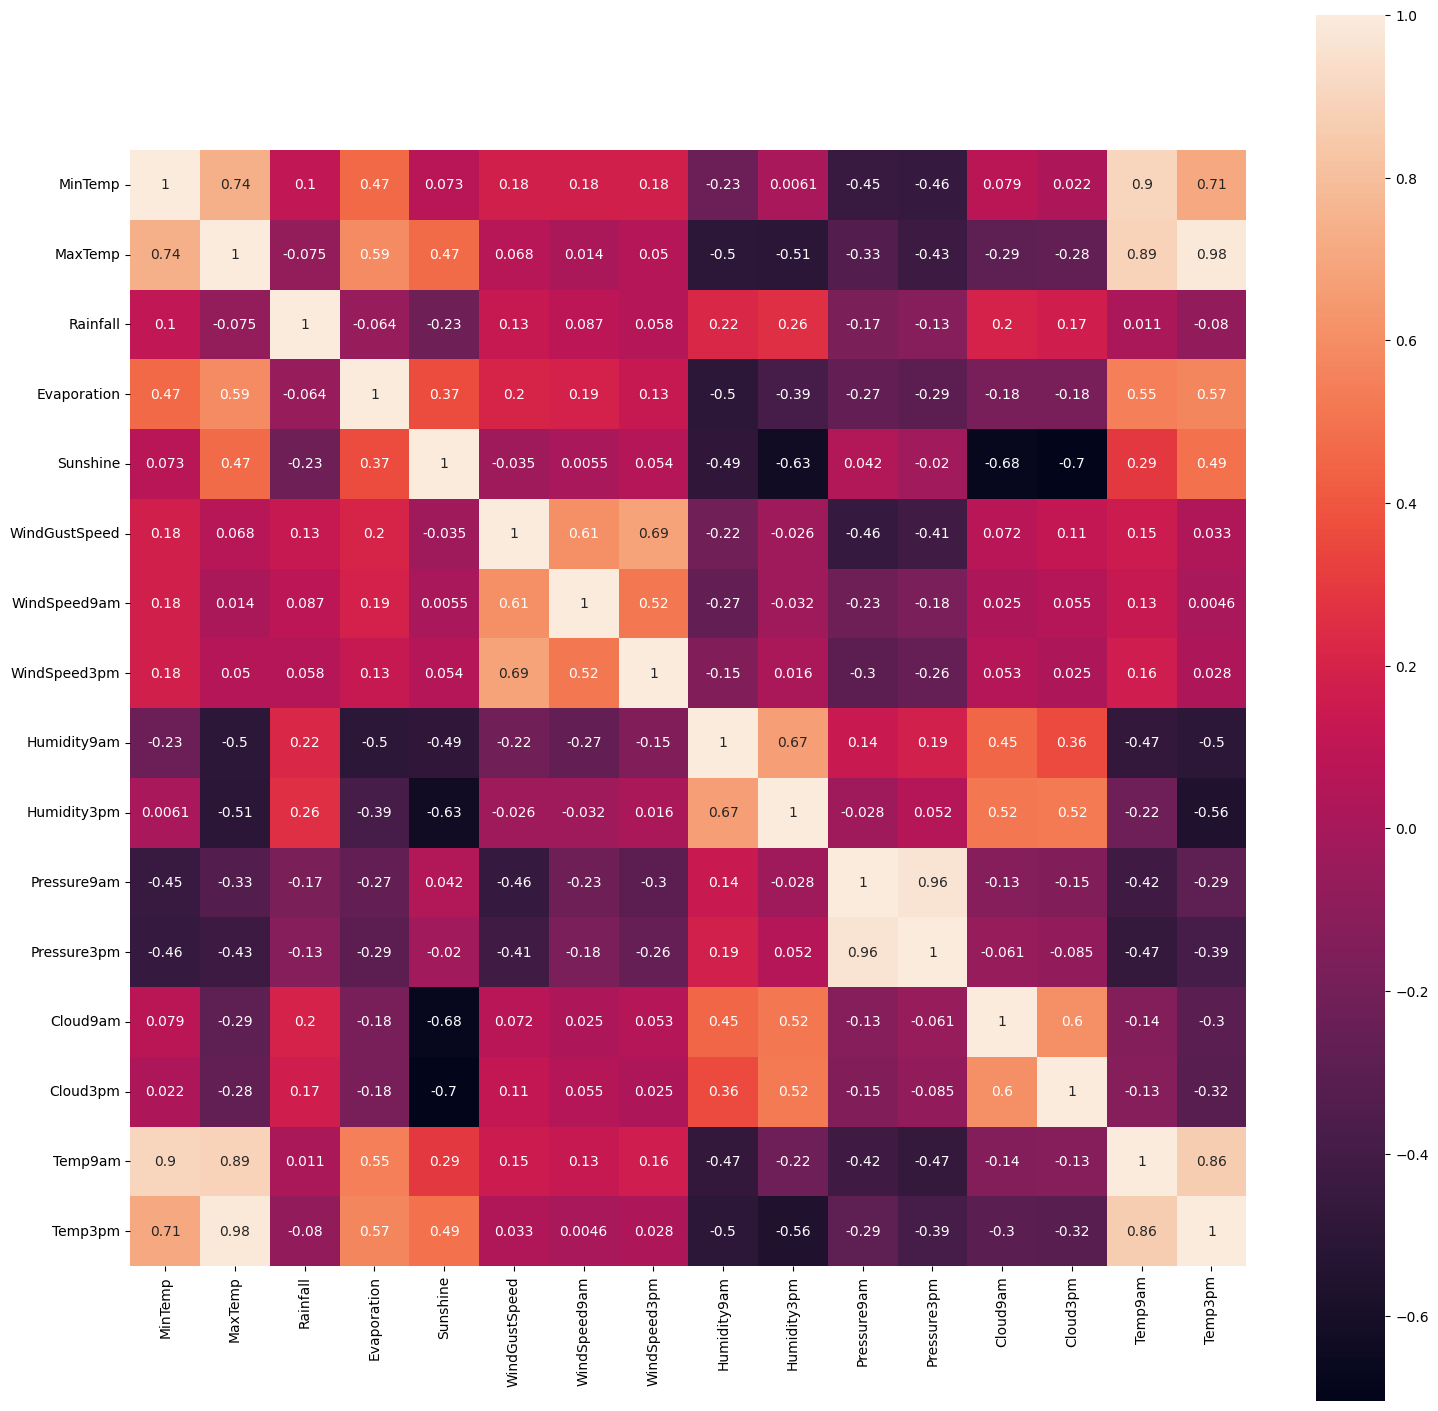

In [324]:
#MATRIZ DE CORRELACIÓN ENTRE VARIABLES NUMÉRICAS
numerical_columns = weather.select_dtypes(include=['float64', 'int64'])
# crear la matriz de correlación
corr_matrix = numerical_columns.corr()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 18))
sns.heatmap(corr_matrix,square = True, ax = ax, annot=True)
ax.tick_params(labelsize = 10)

#### Los valores más oscuros del heatmap corresponden a valores de correlación más bajos

<Axes: xlabel='MaxTemp', ylabel='MinTemp'>

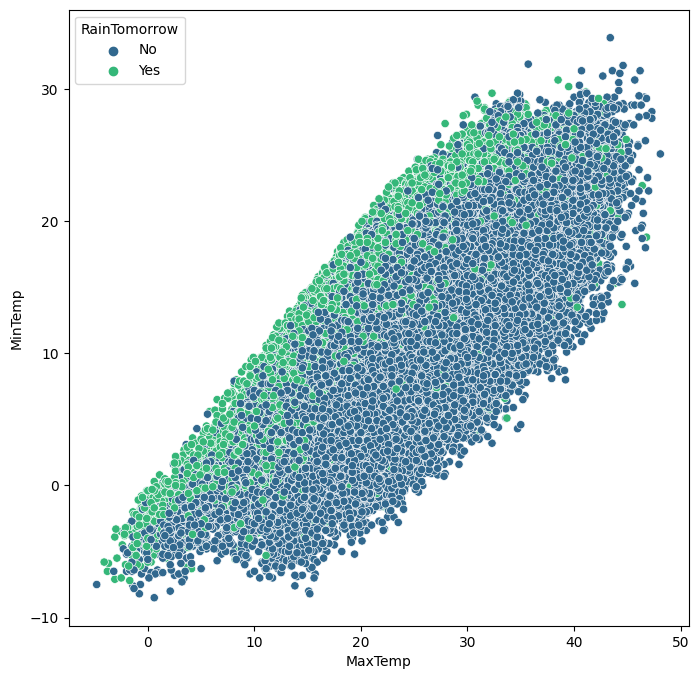

In [325]:
#Relacion de variables de temperatura con variable objetivo
plt.figure(figsize=(8,8))
sns.scatterplot(x = 'MaxTemp', y = 'MinTemp', hue = 'RainTomorrow', palette = 'viridis', data = weather) 

<Axes: xlabel='Humidity9am', ylabel='Temp9am'>

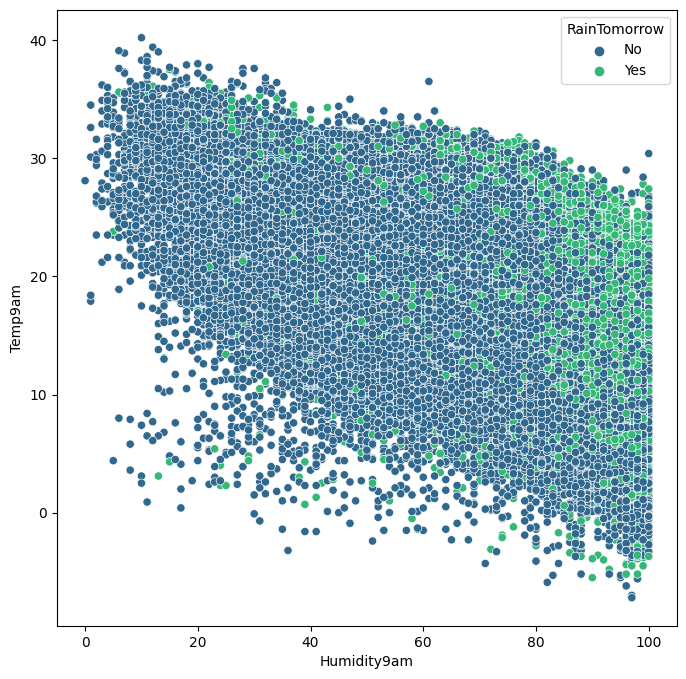

In [326]:
#Relacion de variables de Temperatura y Humedad con variable objetivo
plt.figure(figsize=(8,8))
sns.scatterplot(x = 'Humidity9am', y = 'Temp9am', hue = 'RainTomorrow', palette = 'viridis', data = weather) 

## PREPROCESAMIENTO DE LOS DATOS

In [327]:
#BUSCAR REGISTRO ANTERIOR (POR CAMPOS "DATE" Y "LOCACION") Y COMPLETAR CON RainToday AL QUE TIENE VALOR NULO EN RainTomorrow
# weather['RainTomorrowCompleto'] = weather['RainTomorrow'].fillna(weather.groupby(['Date', 'Location'])['RainToday'].shift(-1))

In [328]:
#MOSTRAR weather CON LOS REGISTROS QUE NO TIENEN VALOR EN RainTomorrow PERO SI EN RainTomorrowCompleto
# weather[weather['RainTomorrow'].isnull() & ~weather['RainTomorrowCompleto'].isnull()]

In [329]:
#BORRAR FEATURES CON GRAN CANTIDAD DE VALORES NULOS
# Evaporation 43.1665 %
# Sunshine 48.0098 %
# Cloud9am 38.4216 %
# Cloud3pm 40.8071 %
# RainToday (Tenemos mas información en la columa RainFall)
# Temp9am (Tiene una alta correlación con la variable MinTemp)
# Temp3pm (Tiene una alta correlación con la variable MaxTemp)
weather.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm', 'RainToday', 'Temp9am', 'Temp3pm'], axis=1, inplace=True)

In [330]:
#FILAS CON 4 O MAS VALORES FALTANTES
weather.drop(weather[weather.isnull().sum(axis=1) >= 4].index, axis=0, inplace=True)

In [331]:
#BORRAR REGISTROS CON VARIABLE OBJETIVO NULA
weather.drop(weather[weather["RainTomorrow"].isnull()].index, axis=0, inplace=True) 

In [332]:
weather

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,No


In [333]:
target = weather['RainTomorrow']
target.head()


0    No
1    No
2    No
3    No
4    No
Name: RainTomorrow, dtype: object

In [334]:
#ELIMINAMOS DEL DATASET LA COLUMA DE target
weather.drop('RainTomorrow', axis=1, inplace=True)
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0


#### DIVISION DE LOS DATOS EN TRAIN Y TEST

In [335]:
xtrain,xtest,ytrain,ytest = train_test_split(weather,
                                             target,
                                             test_size=0.25,
                                             random_state=14,
                                             stratify=target
                                             )

In [336]:
counts = ytrain.value_counts()
counts

RainTomorrow
No     79762
Yes    22852
Name: count, dtype: int64

In [337]:
percentages = counts / counts.sum() * 100
percentages

RainTomorrow
No     77.730134
Yes    22.269866
Name: count, dtype: float64

In [338]:
counts = ytest.value_counts()
counts

RainTomorrow
No     26587
Yes     7618
Name: count, dtype: int64

In [339]:
counts = ytest.value_counts()
percentages = counts / counts.sum() * 100
percentages

RainTomorrow
No     77.728402
Yes    22.271598
Name: count, dtype: float64

### No se pierde la proporción de los datos al dividir el dataset

# MISSING VALUES

In [340]:
from ImputacionLib import recomendar_imputacion

In [341]:
xtrain.isnull().sum()

Date                0
Location            0
MinTemp           124
MaxTemp            59
Rainfall          840
WindGustDir      3391
WindGustSpeed    3377
WindDir9am       5603
WindDir3pm        555
WindSpeed9am       75
WindSpeed3pm       47
Humidity9am       794
Humidity3pm      1161
Pressure9am      7379
Pressure3pm      7329
dtype: int64

In [342]:
# FUNCION QUE ANALIZA CADA COLUMNA Y NOS RECOMIENDA UN METODO DE IMPUTACION
for columna in xtrain.columns[xtrain.isnull().any()]:
    columna_datos = xtrain[columna]
    print("Columna =", columna)
    causa_faltante = "MCAR"
    metodo_imputacion = recomendar_imputacion(columna_datos, causa_faltante)
    print("Método de imputación recomendado:", metodo_imputacion)
    print()

Columna = MinTemp
Información de la columna:
Tipo de dato: Numérica
Porcentaje de datos faltantes: 0.12084121075096965
Media: 12.170225387842718
Mediana: 12.0
Maximo: 33.9
Minimo: -8.5
¿Cantidad outliers?: 11
¿Porcentaje outliers?: 0.010719784824682792
Causa de los datos faltantes: MCAR
Método de imputación recomendado: Imputación con mediana

Columna = MaxTemp
Información de la columna:
Tipo de dato: Numérica
Porcentaje de datos faltantes: 0.05749702769602588
Media: 23.249089756715907
Mediana: 22.6
Maximo: 48.1
Minimo: -3.7
¿Cantidad outliers?: 196
¿Porcentaje outliers?: 0.19100707505798428
Causa de los datos faltantes: MCAR
Método de imputación recomendado: Imputación con mediana

Columna = Rainfall
Información de la columna:
Tipo de dato: Numérica
Porcentaje de datos faltantes: 0.8186017502485041
Media: 2.3205838426317134
Mediana: 0.0
Maximo: 371.0
Minimo: 0.0
¿Cantidad outliers?: 1721
¿Porcentaje outliers?: 1.6771590621162804
Causa de los datos faltantes: MCAR
Método de imputación 

### Se recortan los outliers de las columnas que superan un 0.5% de outliers

# TRATAMIENTO DE OUTLIERS

In [343]:
# MOSTRAR HISTOGRAMA DE VARIAS VARIABLES EN UN MISMO PLOT
def plot_multiple_histograms(dataframe, variables, n_rows, n_cols):
    fig = plt.figure(figsize=(16, 12))
    for i, var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        dataframe[var_name].hist(bins=20, ax=ax)
        ax.set_title(var_name, fontsize=11)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

In [344]:
# BOXPLOT PARA TODAS LAS VARIABLES NUMERICAS
def plot_boxplot(dataframe, variables, n_rows, n_cols):
    fig = plt.figure(figsize=(20, 30))
    for i, var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        dataframe[var_name].plot(kind='box', ax=ax)
        ax.set_title(var_name, fontsize=11)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

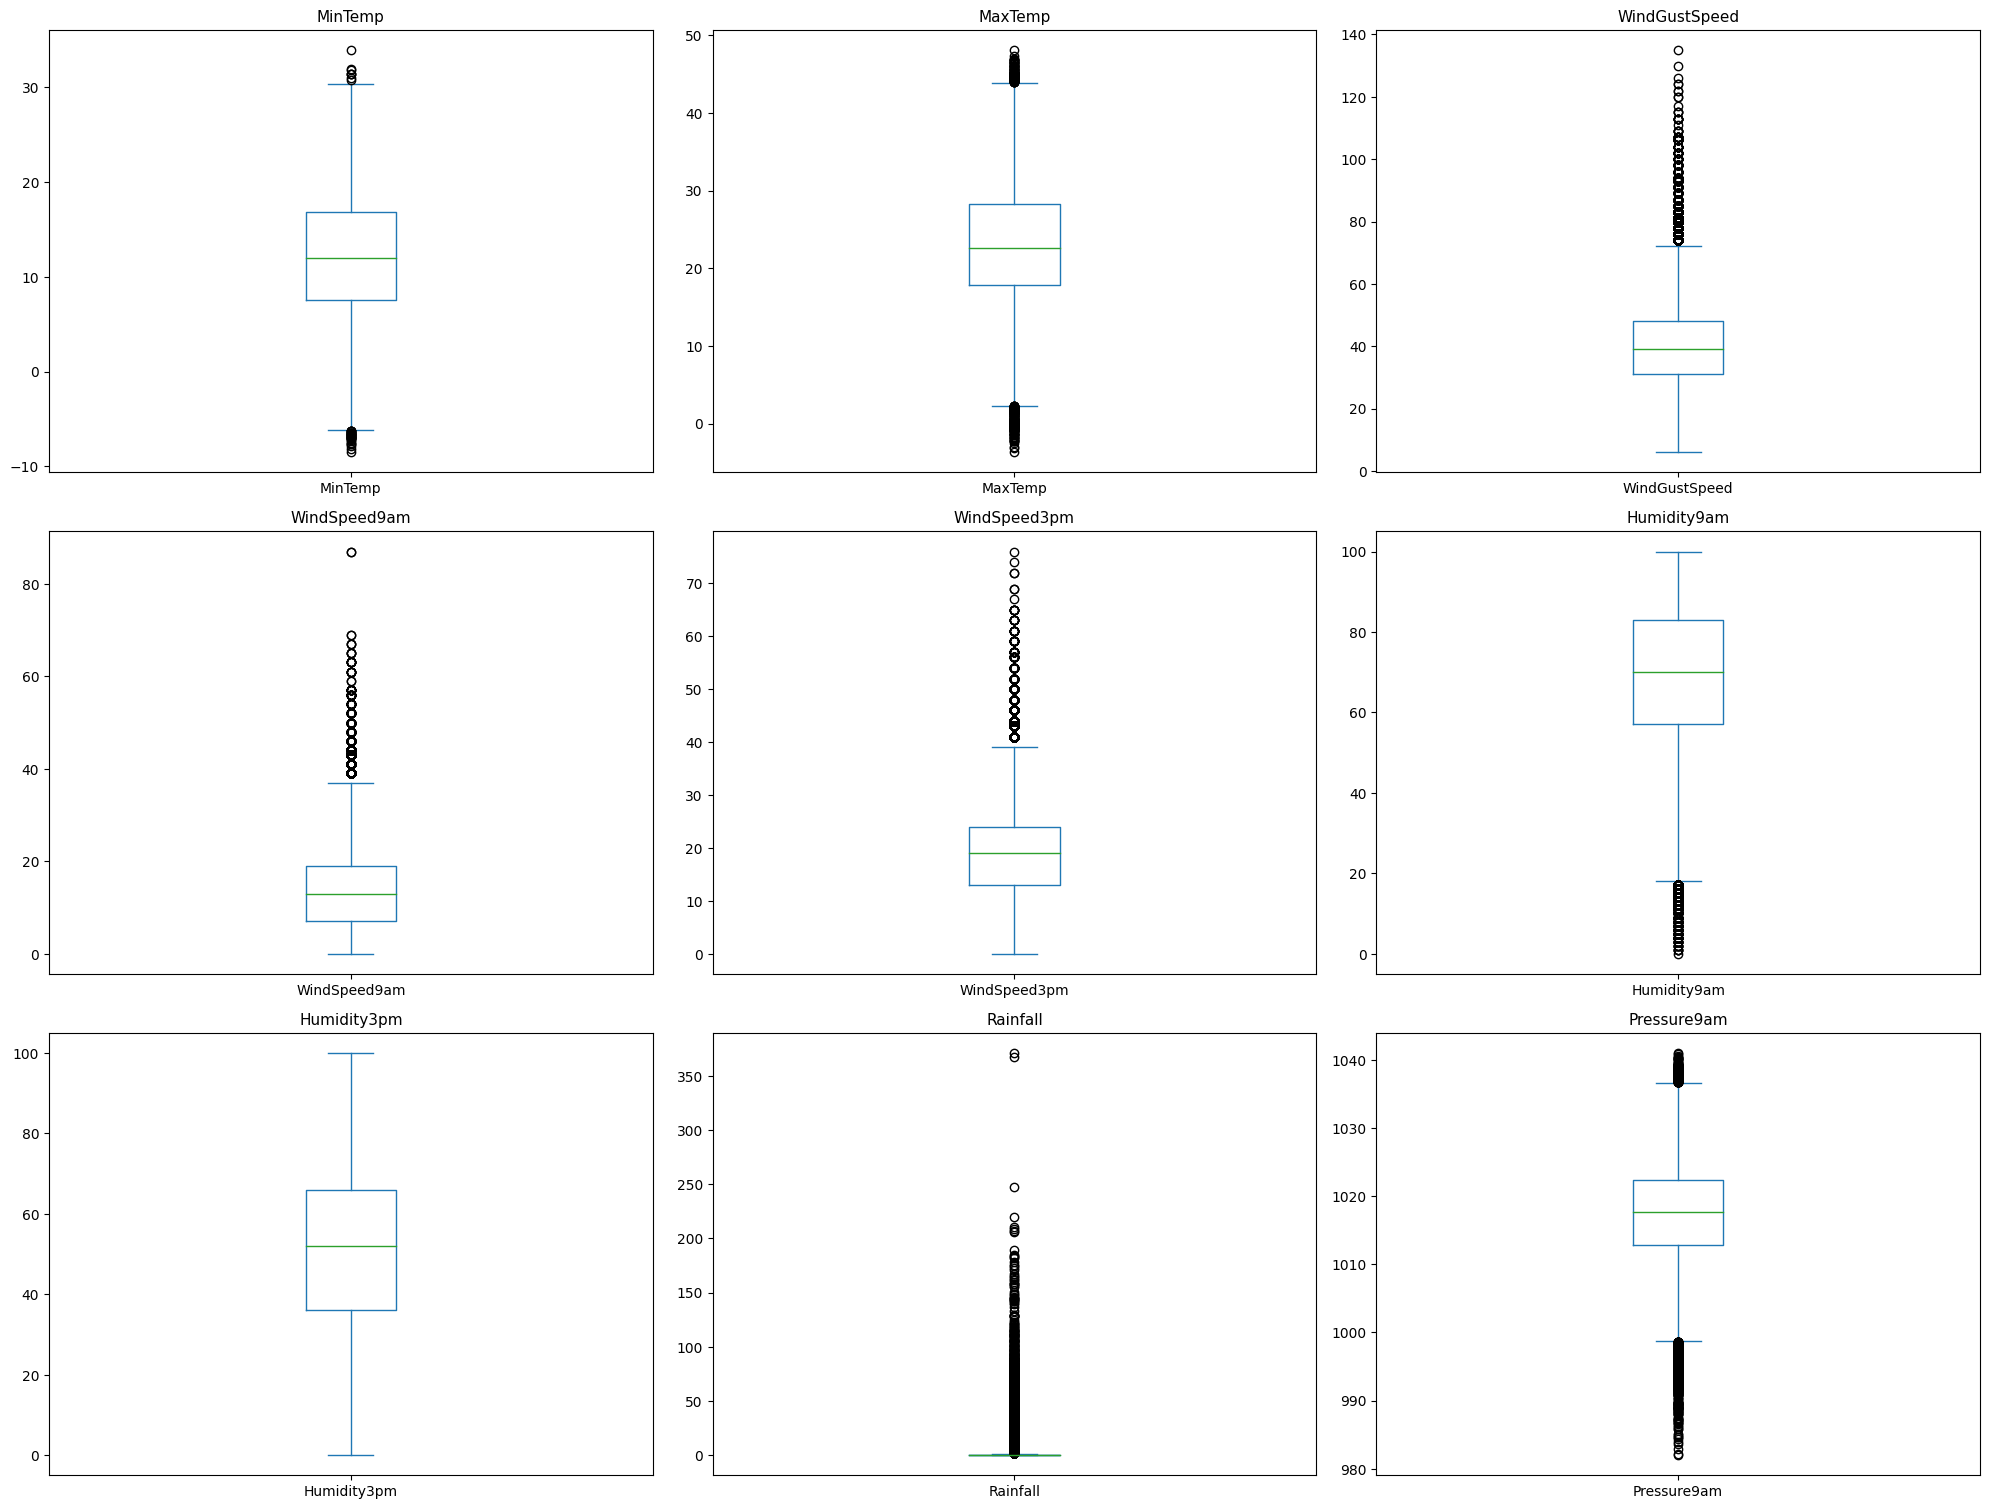

In [345]:
plot_boxplot(xtrain, ['MinTemp', 'MaxTemp', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Rainfall', 'Pressure9am'], 6, 3)


In [346]:
#CAPPING DE OUTLIERS EN WindGustSpeed
# Establece el valor máximo designado
max_value_WindGustSpeed = np.mean(xtrain['WindGustSpeed']) + 3 * np.std(xtrain['WindGustSpeed'])

# Reemplaza los outliers por el valor máximo designado
xtrain['WindGustSpeed'] = np.where(xtrain['WindGustSpeed'] > max_value_WindGustSpeed, max_value_WindGustSpeed, xtrain['WindGustSpeed'])

In [347]:
#CAPPING DE OUTLIERS EN WindSpeed9am
# Establece el valor máximo designado
max_value_WindSpeed9am = np.mean(xtrain['WindSpeed9am']) + 3 * np.std(xtrain['WindSpeed9am'])

# Reemplaza los outliers por el valor máximo designado
xtrain['WindSpeed9am'] = np.where(xtrain['WindSpeed9am'] > max_value_WindSpeed9am, max_value_WindSpeed9am, xtrain['WindSpeed9am'])

In [348]:
#CAPPING DE OUTLIERS EN WindSpeed3pm
# Establece el valor máximo designado
max_value_WindSpeed3pm = np.mean(xtrain['WindSpeed3pm']) + 3 * np.std(xtrain['WindSpeed3pm'])

# Reemplaza los outliers por el valor máximo designado
xtrain['WindSpeed3pm'] = np.where(xtrain['WindSpeed3pm'] > max_value_WindSpeed3pm, max_value_WindSpeed3pm, xtrain['WindSpeed3pm'])

In [349]:
#CAPPING DE OUTLIERS EN Rainfall
# Establece el valor máximo designado
max_value_Rainfall = np.mean(xtrain['Rainfall']) + 3 * np.std(xtrain['Rainfall'])

# Reemplaza los outliers por el valor máximo designado
xtrain['Rainfall'] = np.where(xtrain['Rainfall'] > max_value_Rainfall, max_value_Rainfall, xtrain['Rainfall'])

In [350]:
# Copiar el dataset original
xtrain_original = xtrain.copy()
ytrain_original = ytrain.copy()

## IMPUTACION

In [351]:
#PORCENTAJE DE VALORES NULOS EN COLUMNAS
for col in xtrain.columns:
    if xtrain[col].isnull().mean()>0:
        print(col, round((xtrain[col].isnull().mean())*100,4), "%")

MinTemp 0.1208 %
MaxTemp 0.0575 %
Rainfall 0.8186 %
WindGustDir 3.3046 %
WindGustSpeed 3.291 %
WindDir9am 5.4603 %
WindDir3pm 0.5409 %
WindSpeed9am 0.0731 %
WindSpeed3pm 0.0458 %
Humidity9am 0.7738 %
Humidity3pm 1.1314 %
Pressure9am 7.191 %
Pressure3pm 7.1423 %


In [352]:
# COLUMNAS CON < 0.5% DE OUTLIERS QUE SE IMPUTAN CON LA MEDIA
for col in ['MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm']:
    col_mean=xtrain[col].mean()
    xtrain[col].fillna(col_mean, inplace=True) 

In [353]:
# COLUMNAS CON > 0.5% DE OUTLIERS QUE SE IMPUTAN CON LA MEDIANA
for col in ['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Rainfall']:
    col_median=xtrain[col].median()
    xtrain[col].fillna(col_median, inplace=True) 

In [354]:
# CONVERTIR DIRECCION DEL VIENTO DE STRING A NUMERICO ENTRE 0 y 360º
xtrain['WindGustDir'] = xtrain['WindGustDir'].replace({"N": 0, "NNE": 22.5, "NE": 45, "ENE": 67.5, "E": 90, "ESE": 112.5, "SE": 135, "SSE": 157.5, "S": 180, "SSW": 202.5, "SW": 225, "WSW": 247.5, "W": 270, "WNW": 292.5, "NW": 315, "NNW": 337.5}).astype(float)
xtrain['WindDir9am'] = xtrain['WindDir9am'].replace({"N": 0, "NNE": 22.5, "NE": 45, "ENE": 67.5, "E": 90, "ESE": 112.5, "SE": 135, "SSE": 157.5, "S": 180, "SSW": 202.5, "SW": 225, "WSW": 247.5, "W": 270, "WNW": 292.5, "NW": 315, "NNW": 337.5}).astype(float)
xtrain['WindDir3pm'] = xtrain['WindDir3pm'].replace({"N": 0, "NNE": 22.5, "NE": 45, "ENE": 67.5, "E": 90, "ESE": 112.5, "SE": 135, "SSE": 157.5, "S": 180, "SSW": 202.5, "SW": 225, "WSW": 247.5, "W": 270, "WNW": 292.5, "NW": 315, "NNW": 337.5}).astype(float)

In [355]:
#IMPRIMIR LAS FILAS DE LOS VALORES NULOS DE LA COLUMNA 'Pressure9am'
xtrain[xtrain['Pressure9am'].isnull()]

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm
54083,2014-09-11,MountGinini,-0.3,7.2,0.0,270.0,65.0,270.0,270.0,28.0,22.0,97.0,94.0,NaN,NaN
24222,2009-03-05,Penrith,11.8,26.8,0.0,67.5,31.0,225.0,135.0,11.0,20.0,45.0,27.0,NaN,NaN
5368,2015-08-15,BadgerysCreek,3.9,19.3,0.0,90.0,22.0,225.0,112.5,9.0,13.0,74.0,62.0,NaN,NaN
126020,2015-04-06,SalmonGums,7.4,20.0,0.0,135.0,31.0,90.0,135.0,15.0,6.0,68.0,41.0,NaN,NaN
26070,2014-06-25,Penrith,10.1,18.2,0.0,270.0,52.0,270.0,247.5,20.0,20.0,40.0,36.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124880,2011-12-24,SalmonGums,14.5,27.1,0.0,157.5,50.0,157.5,157.5,19.0,26.0,65.0,28.0,NaN,NaN
25609,2013-03-21,Penrith,14.5,30.3,0.0,22.5,35.0,45.0,22.5,4.0,20.0,98.0,45.0,NaN,NaN
24930,2011-02-12,Penrith,22.8,24.2,0.0,180.0,31.0,180.0,270.0,15.0,7.0,89.0,96.0,NaN,NaN
54165,2014-12-02,MountGinini,9.0,21.7,0.0,270.0,48.0,315.0,270.0,24.0,20.0,98.0,56.0,NaN,NaN


In [356]:
#IMPRIMIR LAS FILAS DE LOS VALORES NULOS DE LA COLUMNA 'Pressure3pm'
xtrain[xtrain['Pressure3pm'].isnull()]

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm
54083,2014-09-11,MountGinini,-0.3,7.2,0.0,270.0,65.0,270.0,270.0,28.0,22.0,97.0,94.0,NaN,NaN
24222,2009-03-05,Penrith,11.8,26.8,0.0,67.5,31.0,225.0,135.0,11.0,20.0,45.0,27.0,NaN,NaN
5368,2015-08-15,BadgerysCreek,3.9,19.3,0.0,90.0,22.0,225.0,112.5,9.0,13.0,74.0,62.0,NaN,NaN
126020,2015-04-06,SalmonGums,7.4,20.0,0.0,135.0,31.0,90.0,135.0,15.0,6.0,68.0,41.0,NaN,NaN
26070,2014-06-25,Penrith,10.1,18.2,0.0,270.0,52.0,270.0,247.5,20.0,20.0,40.0,36.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124880,2011-12-24,SalmonGums,14.5,27.1,0.0,157.5,50.0,157.5,157.5,19.0,26.0,65.0,28.0,NaN,NaN
25609,2013-03-21,Penrith,14.5,30.3,0.0,22.5,35.0,45.0,22.5,4.0,20.0,98.0,45.0,NaN,NaN
24930,2011-02-12,Penrith,22.8,24.2,0.0,180.0,31.0,180.0,270.0,15.0,7.0,89.0,96.0,NaN,NaN
54165,2014-12-02,MountGinini,9.0,21.7,0.0,270.0,48.0,315.0,270.0,24.0,20.0,98.0,56.0,NaN,NaN


In [357]:
#PORCENTAJE DE VALORES NULOS EN COLUMNAS
for col in xtrain.columns:
    if xtrain[col].isnull().mean()>0:
        print(col, round((xtrain[col].isnull().mean())*100,4), "%")

WindGustDir 3.3046 %
WindDir9am 5.4603 %
WindDir3pm 0.5409 %
Pressure9am 7.191 %
Pressure3pm 7.1423 %


In [358]:
#IMPUTACION POR MICE PARA LAS COLUMNAS Pressure9am, Pressure3pm, WindGustDir, WindDir9am, WindDir3pm 
numerical_columns = xtrain.select_dtypes(include=['float64', 'int64'])

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

imp = IterativeImputer(max_iter=50, random_state=43, estimator=LinearRegression())
imp.fit(xtrain[numerical_columns.columns])
xtrain[numerical_columns.columns] = imp.transform(xtrain[numerical_columns.columns])
xtrain[numerical_columns.columns].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
dtype: int64

In [359]:
#PORCENTAJE DE VALORES NULOS EN COLUMNAS
for col in xtrain.columns:
    if xtrain[col].isnull().mean()>0:
        print(col, round((xtrain[col].isnull().mean())*100,4), "%")

# TRANSFORMACIÓN

In [360]:
from sklearn.preprocessing import PowerTransformer

#Se convierten a normales las distribuciones de las siguientes variables
power = PowerTransformer(method= 'yeo-johnson', standardize=True )
xtrain['MaxTemp'] = power.fit_transform(xtrain[['MaxTemp']]) 
xtrain['WindGustSpeed'] = power.fit_transform(xtrain[['WindGustSpeed']]) 
xtrain['WindSpeed9am'] = power.fit_transform(xtrain[['WindSpeed9am']])
xtrain['WindSpeed3pm'] = power.fit_transform(xtrain[['WindSpeed3pm']])
xtrain['Humidity9am'] = power.fit_transform(xtrain[['Humidity9am']])
xtrain['Pressure9am'] = power.fit_transform(xtrain[['Pressure9am']])
xtrain['Rainfall'] = power.fit_transform(xtrain[['Rainfall']])


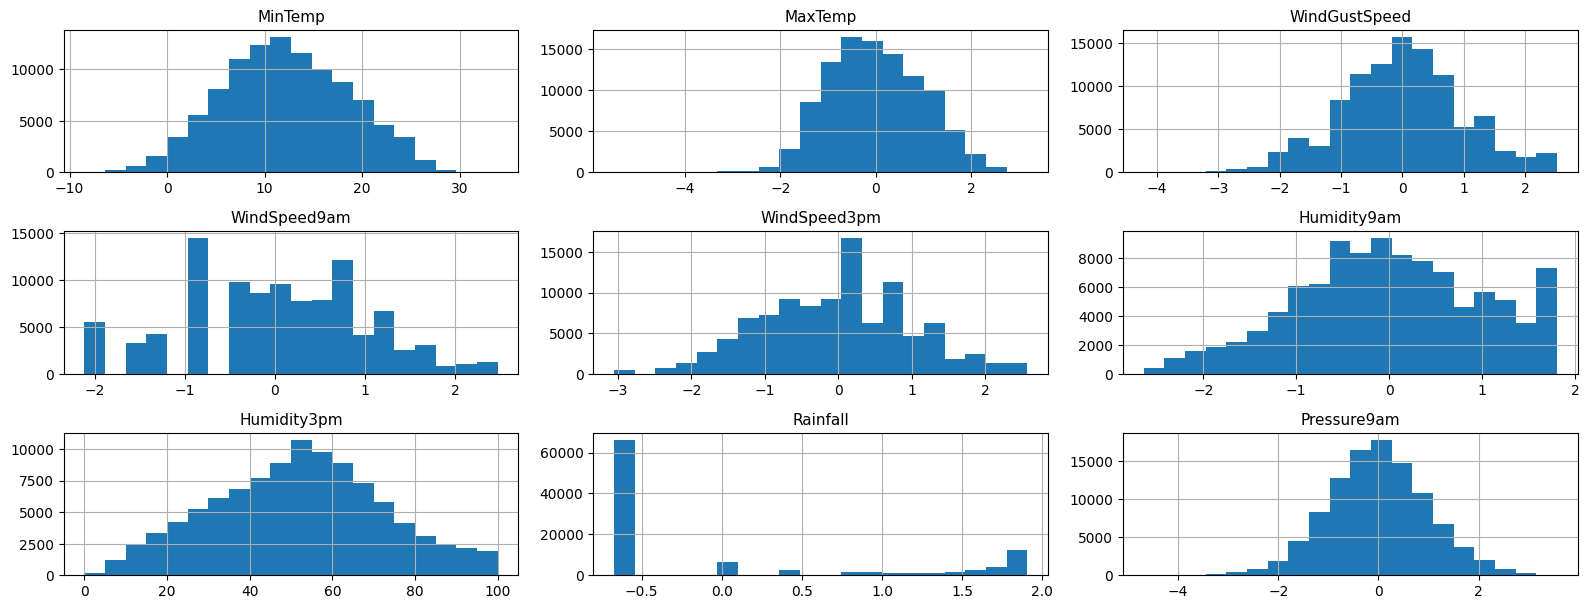

In [361]:
# MOSTRAR HISTOGRAMA DE VARIAS VARIABLES EN UN MISMO PLOT
def plot_multiple_histograms(dataframe, variables, n_rows, n_cols):
    fig = plt.figure(figsize=(16, 12))
    for i, var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        dataframe[var_name].hist(bins=20, ax=ax)
        ax.set_title(var_name, fontsize=11)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

#HISTOGRAMA DE VARIABLES NUMERICAS
plot_multiple_histograms(xtrain, ['MinTemp', 'MaxTemp', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Rainfall', 'Pressure9am'], 6, 3)


In [362]:
xtrain.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
dtype: int64

# ENCODING

In [363]:
#CONVERTIMOS LA VARIABLE OBJETIVO A 0 Y 1
ytrain = ytrain.replace({"Yes": 1, "No": 0}).astype(bool)

In [364]:
ytrain

63945      True
114917    False
75294     False
98371     False
138379    False
          ...  
107504    False
56301     False
85197     False
85574     False
110101     True
Name: RainTomorrow, Length: 102614, dtype: bool

In [365]:
xtrain = pd.get_dummies(xtrain, columns=['Location'], drop_first=True, dummy_na=True, dtype=bool) 

In [366]:
xtrain.head()

,Date,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,Location_nan
63945,2016-10-23,6.7,-1.199436,1.898276,247.5,0.045761,247.5,202.5,0.222089,-1.173561,0.392517,64.0,0.855866,1023.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
114917,2009-10-25,15.6,1.311847,-0.672497,90.0,2.398579,90.0,112.5,2.473831,0.121756,-0.930250,26.0,-0.011017,1015.4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
75294,2009-11-11,13.4,0.830329,-0.672497,225.0,-1.325920,90.0,225.0,-0.911938,-0.611637,0.684950,43.0,0.470302,1020.4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
98371,2014-05-11,12.2,-0.265326,-0.672497,292.5,-1.788619,22.5,292.5,-0.911938,-1.488364,0.925071,57.0,1.307790,1025.8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
138379,2015-06-25,1.9,-1.015288,-0.672497,90.0,0.199274,135.0,112.5,0.222089,1.072322,-0.635312,37.0,2.015630,1027.8,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [367]:
# CONVERTIR COLUMNA DE FECHA EN 3 VALORES ENTEROS
xtrain['Date'] = pd.to_datetime(weather['Date'])
xtrain['Year'] = xtrain['Date'].dt.year
xtrain['Month'] = xtrain['Date'].dt.month
xtrain['Day'] = xtrain['Date'].dt.day
xtrain.drop('Date', axis=1, inplace = True)


In [368]:
xtrain.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,Location_nan,Year,Month,Day
63945,6.7,-1.199436,1.898276,247.5,0.045761,247.5,202.5,0.222089,-1.173561,0.392517,64.0,0.855866,1023.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2016,10,23
114917,15.6,1.311847,-0.672497,90.0,2.398579,90.0,112.5,2.473831,0.121756,-0.930250,26.0,-0.011017,1015.4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2009,10,25
75294,13.4,0.830329,-0.672497,225.0,-1.325920,90.0,225.0,-0.911938,-0.611637,0.684950,43.0,0.470302,1020.4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2009,11,11
98371,12.2,-0.265326,-0.672497,292.5,-1.788619,22.5,292.5,-0.911938,-1.488364,0.925071,57.0,1.307790,1025.8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2014,5,11
138379,1.9,-1.015288,-0.672497,90.0,0.199274,135.0,112.5,0.222089,1.072322,-0.635312,37.0,2.015630,1027.8,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2015,6,25


# BALANCEO DEL DATASET

In [369]:
# #Revisamos la proporcion de valores positivos y negativos antes de balancear
# counts = ytrain.value_counts()
# print(counts)
# percentages = counts / counts.sum() * 100
# print(percentages)

RainTomorrow
False    79762
True     22852
Name: count, dtype: int64
RainTomorrow
False    77.730134
True     22.269866
Name: count, dtype: float64


In [370]:
#BALANCEO DE DATASET USANDO OVERSAMPLING (OPCION 1)
# from imblearn.over_sampling import SMOTE

# #APLICAMOS SMOTE PARA OVERSAMPLING
# oversample = SMOTE(sampling_strategy=0.5)
# xtrain, ytrain = oversample.fit_resample(xtrain, ytrain)

In [ ]:
#BALANCEO DE DATASET USANDO OVERSAMPLING (OPCION 2)
# from imblearn.over_sampling import KMeansSMOTE

# # Aplicar KMeansSMOTE
# kmeans_smote = KMeansSMOTE(sampling_strategy=0.5, random_state=42)
# xtrain, ytrain = kmeans_smote.fit_resample(xtrain, ytrain) 

In [ ]:
# #Revisamos la proporcion de valores positivos y negativos despues de hacer oversampling
# counts = ytrain.value_counts()
# print(counts)
# percentages = counts / counts.sum() * 100
# print(percentages)

RainTomorrow
0    79762
1    39882
Name: count, dtype: int64
RainTomorrow
0    66.666109
1    33.333891
Name: count, dtype: float64


In [ ]:
# #BALANCEO DEL DATASET USANDO UNDERSAMPLING (RANDOMSAMPLER) (OPCION 1) MAS RAPIDA
# from imblearn.under_sampling import RandomUnderSampler

# undersample = RandomUnderSampler(sampling_strategy=0.8)
# xtrain, ytrain = undersample.fit_resample(xtrain, ytrain) 

In [ ]:
#BALANCEO DEL DATASET USANDO UNDERSAMPLING (KNN) (OPCION 2) MUY LENTA
# from imblearn.under_sampling import CondensedNearestNeighbour

# #APLICAMOS KNN PARA UNDERSAMPLING
# undersample = CondensedNearestNeighbour(random_state=0)
# xtrain, ytrain = undersample.fit_resample(xtrain, ytrain)

In [ ]:
# #Revisamos la proporcion de valores positivos y negativos despues de hacer oversampling
# counts = ytrain.value_counts()
# print(counts)
# percentages = counts / counts.sum() * 100
# print(percentages)

# ESTANDARIZACIÓN

In [ ]:
#ESTANDARIZAR LOS DATOS
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# xtrain = scaler.fit_transform(xtrain)


# PRE-PROCESAMIENTO DE SET DE TEST

In [ ]:
#PRE PROCESAMOS EL xtest e ytest
xtest['WindGustSpeed'] = np.where(xtest['WindGustSpeed'] > max_value_WindGustSpeed, max_value_WindGustSpeed, xtest['WindGustSpeed'])
xtest['WindSpeed9am'] = np.where(xtest['WindSpeed9am'] > max_value_WindSpeed9am, max_value_WindSpeed9am, xtest['WindSpeed9am'])
xtest['WindSpeed3pm'] = np.where(xtest['WindSpeed3pm'] > max_value_WindSpeed3pm, max_value_WindSpeed3pm, xtest['WindSpeed3pm'])
xtest['Rainfall'] = np.where(xtest['Rainfall'] > max_value_Rainfall, max_value_Rainfall, xtest['Rainfall'])

# COLUMNAS CON < 0.5% DE OUTLIERS QUE SE IMPUTAN CON LA MEDIA
for col in ['MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm']:
    col_mean=xtrain_original[col].mean()
    xtest[col].fillna(col_mean, inplace=True) 

# COLUMNAS CON > 0.5% DE OUTLIERS QUE SE IMPUTAN CON LA MEDIANA
for col in ['Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']:
    col_median=xtrain_original[col].median()
    xtest[col].fillna(col_median, inplace=True) 


In [373]:

# CONVERTIR DIRECCION DEL VIENTO DE STRING A NUMERICO ENTRE 0 y 360º
xtest['WindGustDir'] = xtest['WindGustDir'].replace({"N": 0, "NNE": 22.5, "NE": 45, "ENE": 67.5, "E": 90, "ESE": 112.5, "SE": 135, "SSE": 157.5, "S": 180, "SSW": 202.5, "SW": 225, "WSW": 247.5, "W": 270, "WNW": 292.5, "NW": 315, "NNW": 337.5}).astype(float)
xtest['WindDir9am'] = xtest['WindDir9am'].replace({"N": 0, "NNE": 22.5, "NE": 45, "ENE": 67.5, "E": 90, "ESE": 112.5, "SE": 135, "SSE": 157.5, "S": 180, "SSW": 202.5, "SW": 225, "WSW": 247.5, "W": 270, "WNW": 292.5, "NW": 315, "NNW": 337.5}).astype(float)
xtest['WindDir3pm'] = xtest['WindDir3pm'].replace({"N": 0, "NNE": 22.5, "NE": 45, "ENE": 67.5, "E": 90, "ESE": 112.5, "SE": 135, "SSE": 157.5, "S": 180, "SSW": 202.5, "SW": 225, "WSW": 247.5, "W": 270, "WNW": 292.5, "NW": 315, "NNW": 337.5}).astype(float)


In [375]:
xtest[numerical_columns.columns] = imp.transform(xtest[numerical_columns.columns])

In [376]:
#CONVERTIMOS LA VARIABLE OBJETIVO A 0 Y 1
ytest = ytest.replace({"Yes": 1, "No": 0}).astype(bool)

xtest = pd.get_dummies(xtest, columns=['Location'], drop_first=True, dummy_na=True, dtype=bool) 

# CONVERTIR COLUMNA DE FECHA EN 3 VALORES ENTEROS
xtest['Date'] = pd.to_datetime(weather['Date'])
xtest['Year'] = xtest['Date'].dt.year
xtest['Month'] = xtest['Date'].dt.month
xtest['Day'] = xtest['Date'].dt.day
xtest.drop('Date', axis=1, inplace = True)

# xtest = scaler.fit_transform(xtest)

# ENTRENAMIENTO DEL MODELO

In [671]:
#ENTRENAR RANDOM FOREST PROBANDO DISTINTOS VALORES
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#ENTRENAMOS EL MODELO
lr = LogisticRegression(random_state=0)

#DEFINIMOS LOS PARAMETROS A PROBAR PARA LOGISTIC REGRESSION
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 1000, 2500],
    'class_weight': ['balanced', None],
}

#DEFINIMOS EL GRIDSEARCH USANDO EL SCORING F1
grid_search = GridSearchCV(estimator = lr, scoring='f1', param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 3)

#ENTRENAMOS EL GRIDSEARCH
grid_search.fit(xtrain, ytrain)

#MEJOR PARAMETRO
grid_search.best_params_

#MEJOR SCORE
grid_search.best_score_

#Entrenar el modelo con los mejores parametros
y_pred = grid_search.predict(xtest)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


In [672]:
print(grid_search.best_params_)

{'C': 0.1, 'class_weight': 'balanced', 'max_iter': 100, 'solver': 'liblinear'}


In [673]:
#MATRIZ DE CONFUSION
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(ytest, y_pred)

#PLOT THE MATRIX
# sns.heatmap(confusion_matrix, annot=True, fmt='d')
print(confusion_matrix)

#PRINT DEL REPORT CLASSIFICATION
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred))

[[16666  9921]
 [  899  6719]]
              precision    recall  f1-score   support

           0       0.95      0.63      0.75     26587
           1       0.40      0.88      0.55      7618

    accuracy                           0.68     34205
   macro avg       0.68      0.75      0.65     34205
weighted avg       0.83      0.68      0.71     34205



In [377]:
#ENTRENAR MODELO LOGICTIC REGRESSION
from sklearn.linear_model import LogisticRegression

#ENTRENAMOS EL MODELO
logreg = LogisticRegression(random_state=0, max_iter=3000, solver='liblinear')
logreg.fit(xtrain, ytrain)

#PREDICCIONES
y_pred = logreg.predict(xtest)

<Axes: >

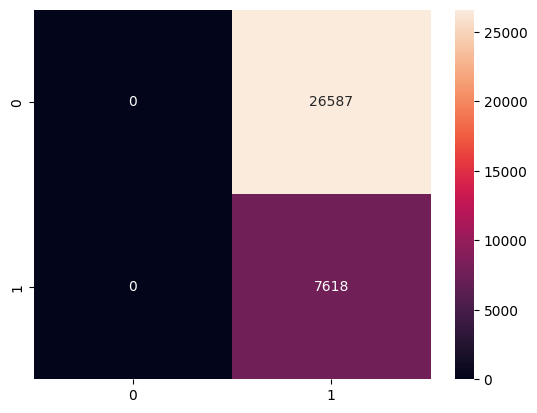

In [378]:
#MATRIZ DE CONFUSION
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(ytest, y_pred)

#PLOT THE MATRIX
sns.heatmap(confusion_matrix, annot=True, fmt='d')

In [ ]:
# #PRINT DEL REPORT CLASSIFICATION
# from sklearn.metrics import classification_report
# print(classification_report(ytest, y_pred))

OS = 0.5 y US= 'auto'

              precision    recall  f1-score   support

           0       0.90      0.86      0.88     26587
           1       0.57      0.66      0.61      7618

    accuracy                           0.81     34205
    macro avg       0.73      0.76      0.74     34205
    weighted avg       0.82      0.81      0.82     34205





OS = 0.5 SOLO              
              
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     26587
           1       0.68      0.52      0.59      7618

    accuracy                           0.84     34205
   macro avg       0.77      0.72      0.74     34205
weighted avg       0.83      0.84      0.83     34205

OS = 0.5 y ESTANDARIZACION

              precision    recall  f1-score   support

           0       0.90      0.84      0.87     26587
           1       0.56      0.69      0.62      7618

    accuracy                           0.81     34205
   macro avg       0.73      0.77      0.75     34205
weighted avg       0.83      0.81      0.82     34205

OS = KNN SMOTE 0.5 y US RANDOMSAMPLER 0.8 y ESTANDARIZACION

              precision    recall  f1-score   support

           0       0.94      0.67      0.78     26587
           1       0.43      0.86      0.57      7618

    accuracy                           0.71     34205
   macro avg       0.69      0.76      0.68     34205
weighted avg       0.83      0.71      0.74     34205

In [667]:
#ENTRENAR RANDOM FOREST PROBANDO DISTINTOS VALORES
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#ENTRENAMOS EL MODELO
rfc = RandomForestClassifier(random_state=0)

#DEFINIMOS LOS PARAMETROS A PROBAR
param_grid = {
    'n_estimators': [40, 50, 60],
    'max_depth': [20, 30, 40]
}

#DEFINIMOS EL GRIDSEARCH USANDO EL SCORING F1
grid_search = GridSearchCV(estimator = rfc, scoring='f1', param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 3)

#ENTRENAMOS EL GRIDSEARCH
grid_search.fit(xtrain, ytrain)

#MEJOR PARAMETRO
grid_search.best_params_

#MEJOR SCORE
grid_search.best_score_

#Entrenar el modelo con los mejores parametros
y_pred = grid_search.predict(xtest)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [668]:
print(grid_search.best_params_)

{'max_depth': 30, 'n_estimators': 60}


In [670]:
#MATRIZ DE CONFUSION
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(ytest, y_pred)

#PLOT THE MATRIX
# sns.heatmap(confusion_matrix, annot=True, fmt='d')
print(confusion_matrix)

#PRINT DEL REPORT CLASSIFICATION
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred))

[[19796  6791]
 [ 1494  6124]]
              precision    recall  f1-score   support

           0       0.93      0.74      0.83     26587
           1       0.47      0.80      0.60      7618

    accuracy                           0.76     34205
   macro avg       0.70      0.77      0.71     34205
weighted avg       0.83      0.76      0.78     34205



OS = 1

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     26587
           1       0.69      0.58      0.63      7618

    accuracy                           0.85     34205
   macro avg       0.79      0.75      0.77     34205
weighted avg       0.84      0.85      0.84     34205



OS = 0.5 SOLO

[[24922  1665]
 [ 3469  4149]]

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     26587
           1       0.71      0.54      0.62      7618

    accuracy                           0.85     34205
   macro avg       0.80      0.74      0.76     34205
weighted avg       0.84      0.85      0.84     34205

OS = 0.5 y Estandarizacion

[[22022  4565]
 [ 2072  5546]]
 
              precision    recall  f1-score   support

           0       0.91      0.83      0.87     26587
           1       0.55      0.73      0.63      7618

    accuracy                           0.81     34205
   macro avg       0.73      0.78      0.75     34205
weighted avg       0.83      0.81      0.81     34205


OS = KNN SMOTE 0.5 y US RANDOMSAMPLER 0.8 y ESTANDARIZACION

[[19796  6791]
 [ 1494  6124]]
 
              precision    recall  f1-score   support

           0       0.93      0.74      0.83     26587
           1       0.47      0.80      0.60      7618

    accuracy                           0.76     34205
   macro avg       0.70      0.77      0.71     34205
weighted avg       0.83      0.76      0.78     34205
